In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [60]:
data=pd.read_csv("Student_performance_data _.csv")

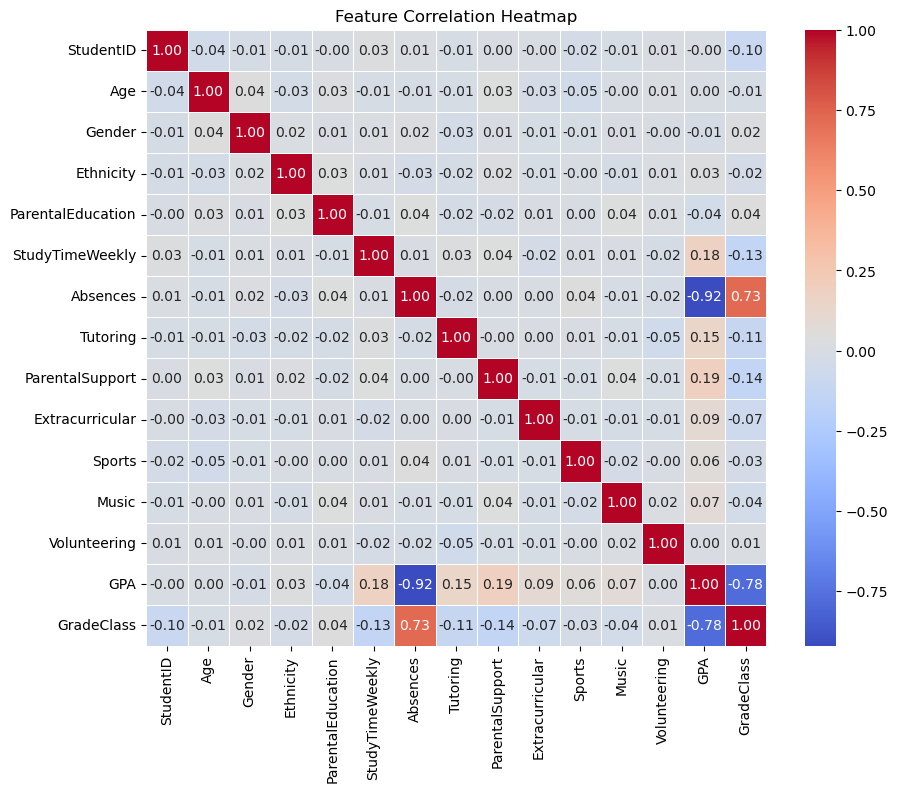

In [61]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [62]:
data.shape

(2392, 15)

In [63]:
print(data.head())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [64]:
print(data.tail())

      StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
2387         2         0                4                1       0      0   
2388         4         1                4                0       1      0   
2389        20         0                2                0       0      0   
2390        17         0                2                0       1      1   
2391        13         0                2                0       0      0   

      Volunteering       GPA  GradeClass  
2387             0 

In [65]:
data= data.drop_duplicates()
data = data.drop(['GradeClass'], axis=1)


In [66]:
data.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
dtype: int64

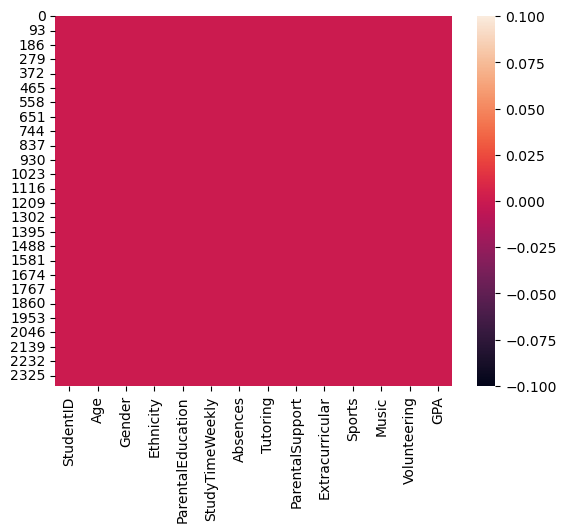

In [67]:
sns.heatmap(data.isna())
plt.show()

In [68]:
import matplotlib.pyplot as plt
nume_df = data.select_dtypes(include="number")
cate_df = data.select_dtypes(include="object_")

In [69]:
print(data.dtypes)

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
dtype: object


['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA']


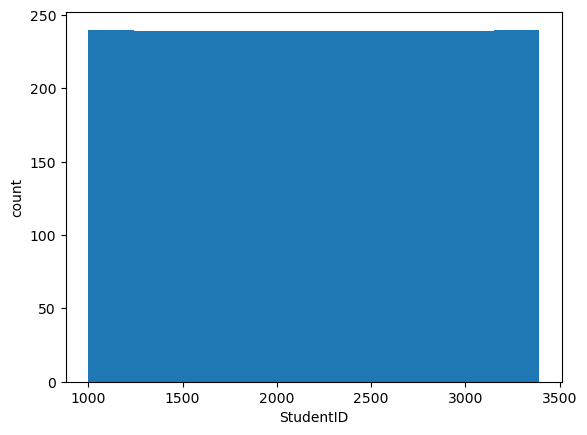

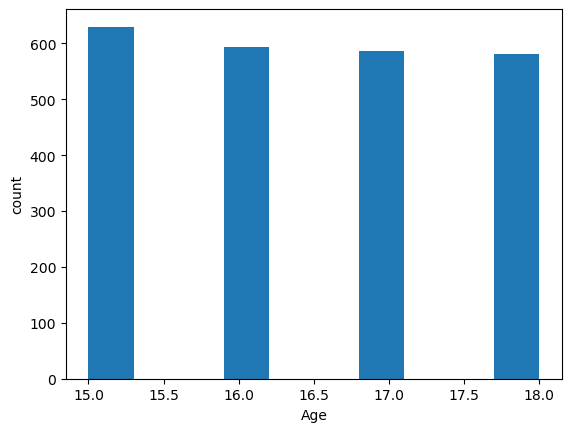

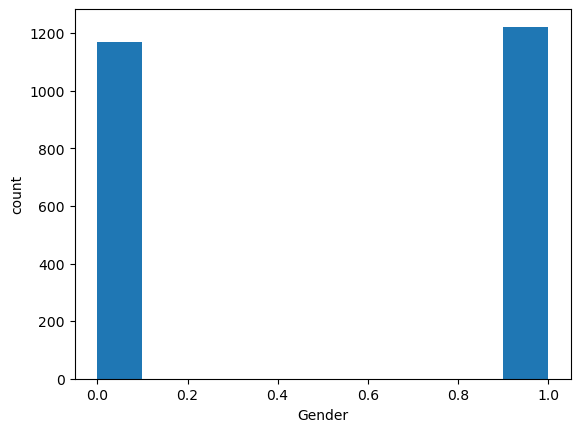

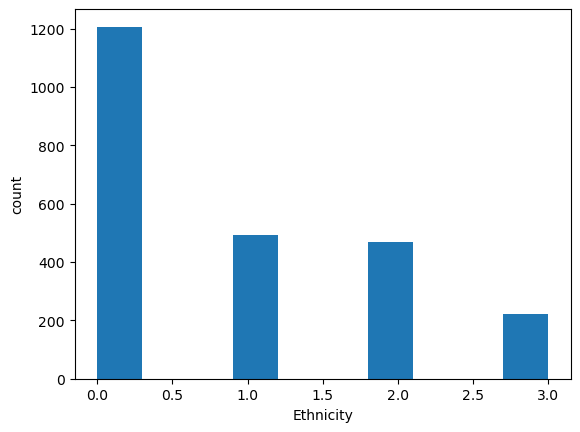

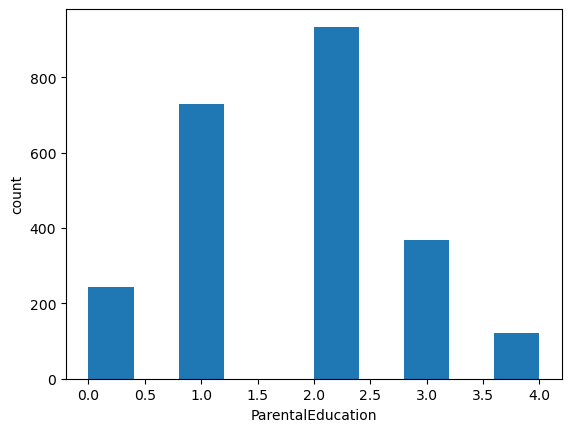

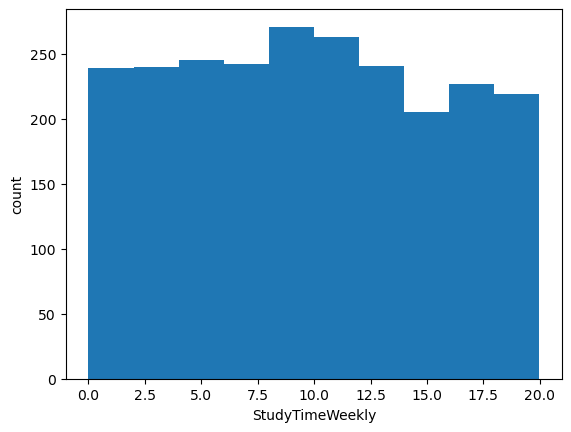

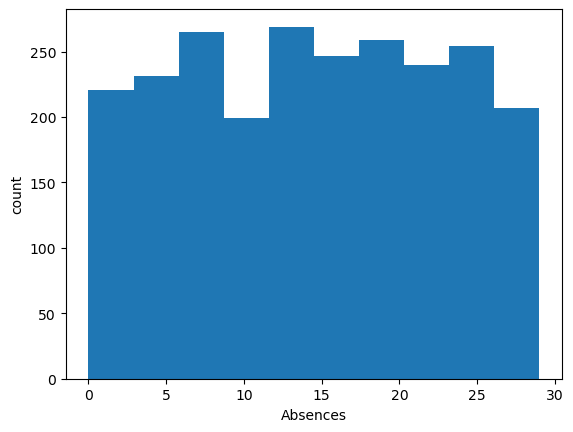

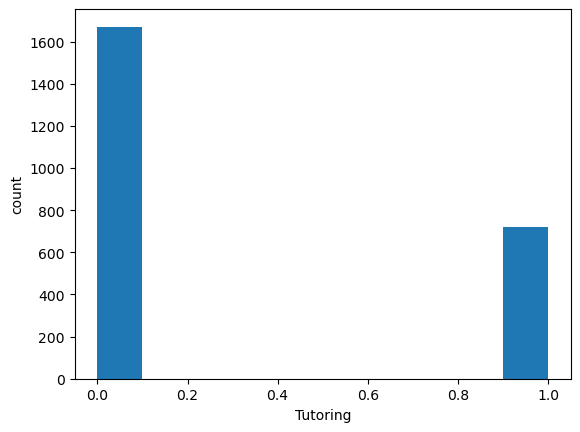

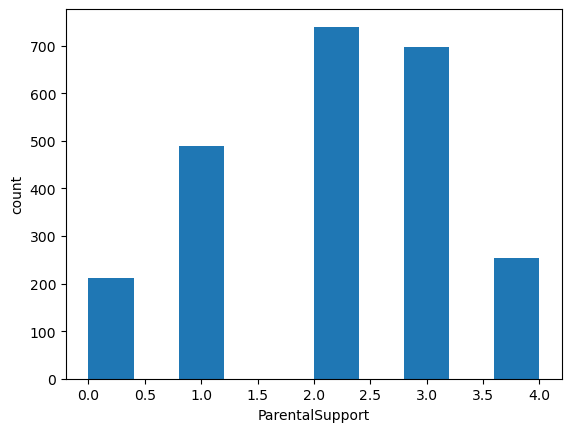

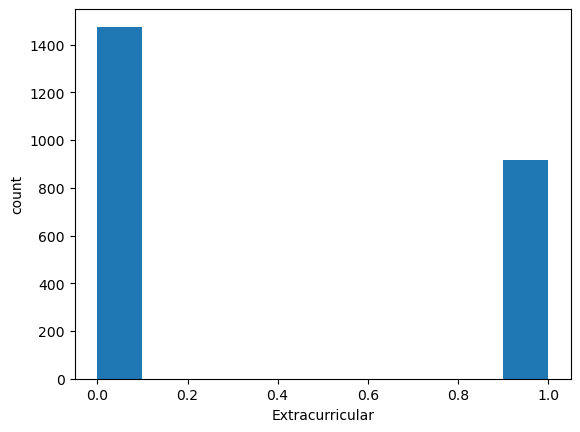

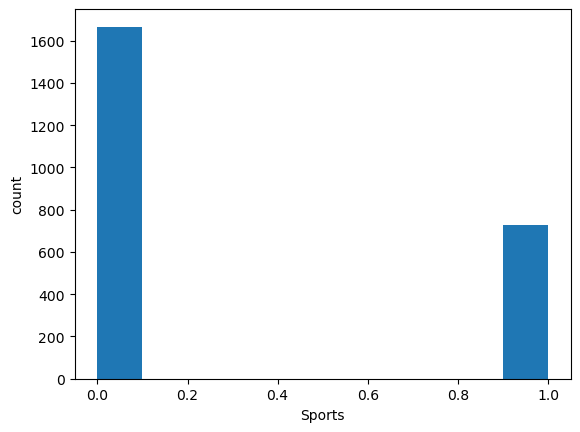

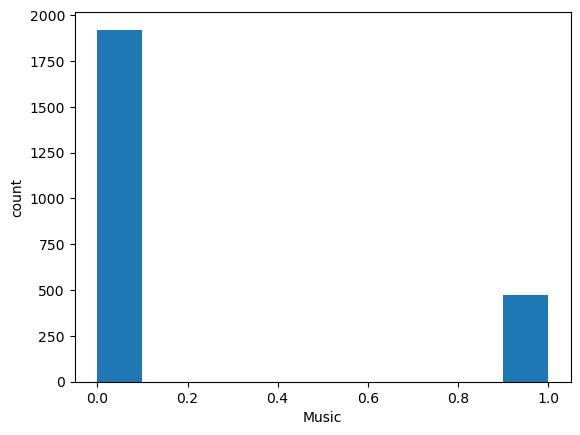

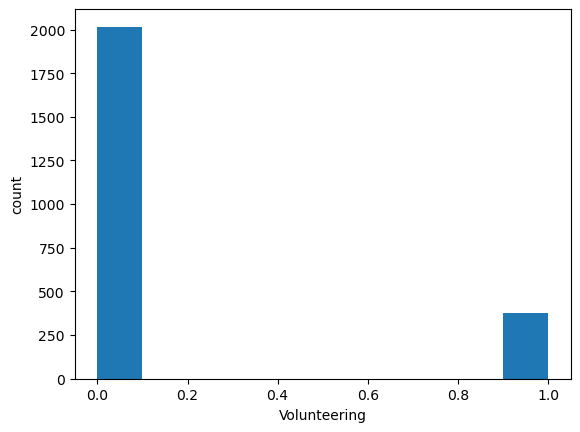

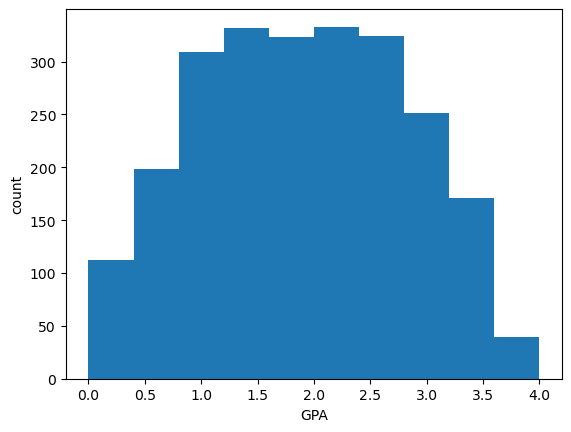

In [70]:
nume_cols = nume_df.columns.tolist()
print(nume_cols)
for col in nume_cols:
  plt.hist(nume_df[col])
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

In [71]:
for col in nume_cols:
  nume_df[col] = nume_df[col].fillna(nume_df[col].median())

In [72]:
nume_df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
dtype: int64

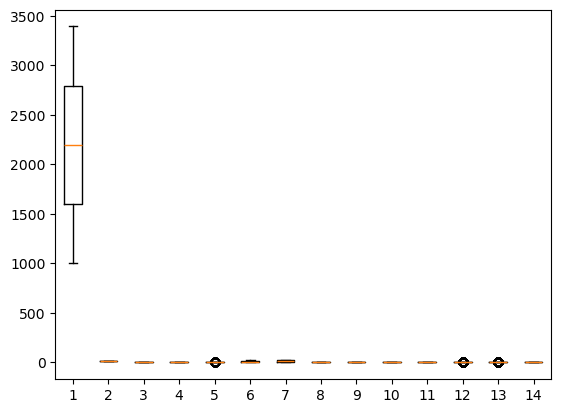

In [73]:
plt.boxplot(nume_df)
plt.show()

In [74]:
def remove_outliers(df, column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    df[column_name]=df[column_name].clip(upper=upper_bound)
    df[column_name]=df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [75]:
for col in nume_cols:
    nume_df[col] = remove_outliers(nume_df, col)

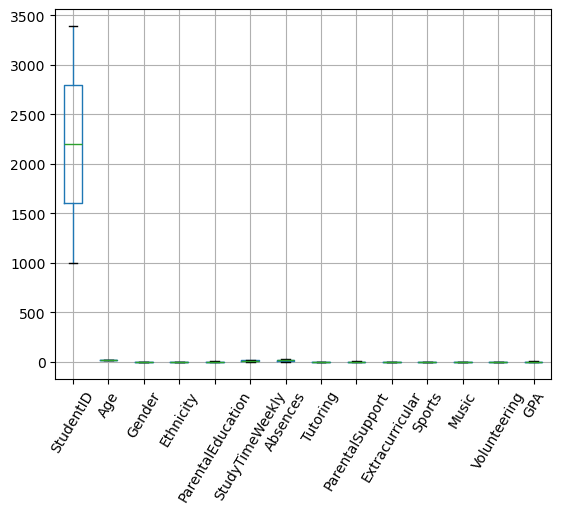

In [76]:
nume_df.boxplot()
plt.xticks(rotation=59)
plt.show()

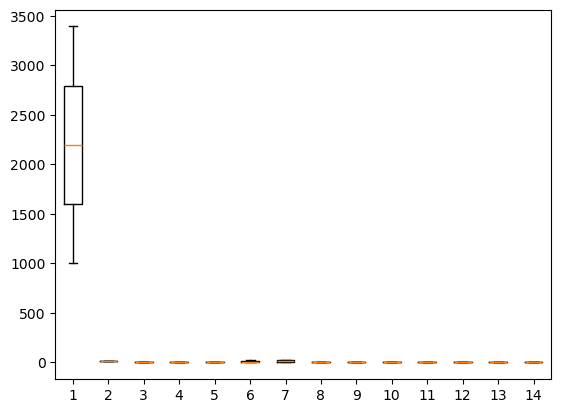

In [77]:
plt.boxplot(nume_df)
plt.show()

In [78]:
print(data[['GPA']])

           GPA
0     2.929196
1     3.042915
2     0.112602
3     2.054218
4     1.288061
...        ...
2387  3.455509
2388  3.279150
2389  1.142333
2390  1.803297
2391  2.140014

[2392 rows x 1 columns]


In [79]:
# Define the function to classify grades based on GPA
def classify_grade(GPA):

    if GPA >= 3.50:
        return 0  # 'A'
    elif 3.0 <= GPA < 3.50:
        return 1  # 'B'
    elif 2.50 <= GPA < 3.0:
        return 2  # 'C'
    elif 2.0 <= GPA < 2.50:
        return 3  # 'D'
    else:
        return 4  # 'F'

# Apply the function to create the GradeClass column
data['GradeClass'] = data['GPA'].apply(classify_grade)


# Check if the GradeClass column is created correctly
print(data[['GPA', 'GradeClass']].head())


        GPA  GradeClass
0  2.929196           2
1  3.042915           1
2  0.112602           4
3  2.054218           3
4  1.288061           4


In [80]:
X = data.drop(columns=['GradeClass','StudentID','GPA'])  # Drop target and ID
y = data['GradeClass']

In [81]:
print(X.columns)


Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering'],
      dtype='object')


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [83]:
import pickle
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
nume_df = scaler.fit_transform(nume_df)

with open("minmax.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [84]:
from sklearn.model_selection import GridSearchCV

log_param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'C': [0.1, 1, 10],
    'class_weight': ['balanced', None]
}

log_grid = GridSearchCV(LogisticRegression(), log_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
log_grid.fit(X_train, y_train)

best_log_model = log_grid.best_estimator_
y_pred_log = best_log_model.predict(X_test)

log_accuracy = accuracy_score(y_test, y_pred_log)
log_precision = precision_score(y_test, y_pred_log, average='weighted')
log_recall = recall_score(y_test, y_pred_log, average='weighted')
log_f1 = f1_score(y_test, y_pred_log, average='weighted')

print("\nBest Logistic Regression Model:")
print(f"Accuracy: {log_accuracy:.4f}")
print(f"Precision: {log_precision:.4f}")
print(f"Recall: {log_recall:.4f}")
print(f"F1 Score: {log_f1:.4f}")

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print("\nBest Random Forest Model:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")


if log_accuracy > rf_accuracy:
    best_model_name = "Logistic Regression"
    best_model = best_log_model
else:
    best_model_name = "Random Forest"
    best_model = best_rf_model

print(f"\nSelected Best Model: {best_model_name}")


with open("best_grade_class_model.pkl", "wb") as f:
    pickle.dump(best_model, f)



Best Logistic Regression Model:
Accuracy: 0.8162
Precision: 0.8140
Recall: 0.8162
F1 Score: 0.8147

Best Random Forest Model:
Accuracy: 0.7591
Precision: 0.7669
Recall: 0.7591
F1 Score: 0.7606

Selected Best Model: Logistic Regression


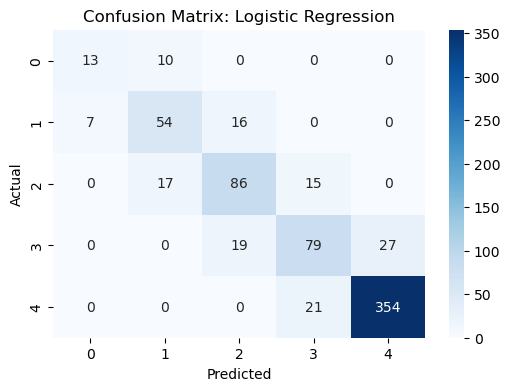

In [85]:
y_pred_best = best_model.predict(X_test)
best_cm = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Confusion Matrix: {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()